# Data
[wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)
  
  Input variables (based on physicochemical tests):
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol

Output variable (based on sensory data):
   - 12 - quality (score between 0 and 10)

// TODO - визуализировать с помощью метода главных компонент

// TODO - нормализовать входные данные

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

wine_data_url_white = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/winequality-white.csv'
wine_data_url_red = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/winequality-red.csv'

wine_df_white = pd.read_csv(wine_data_url_white, sep=';')
wine_df_red = pd.read_csv(wine_data_url_red, sep=';')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
wine_df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
wine_df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(wine_df_white)
clustering.labels_

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
a = np.array(clustering.labels_)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 2253, 1: 2645}

# Custom GridSearch

In [ ]:
import gc
gc.collect()

def Custom_GridSearch(estimator, param_grid, scoring, data):
  scores_and_params = [] # pairs (step_score, step_estimator)

  # Cartesian product may be computed by --itertools.product--
  param_names = list(param_grid.keys())
  params_combinations = [(x,) for x in param_grid[param_names[0]]] # lists of params typles [(p1,p2,p3), (p1,p2,p3')...] with initial
  temp_params_combinations = [] # same with above, for service use
  keys_count = len(param_grid)

  for param_key_index in range(1, keys_count): # starts with second, we already have first param tuples as initial
    temp_params_combinations = list(params_combinations) # save
    params_combinations.clear()
    for param_value in param_grid[param_names[param_key_index]]:
      for param_tuple in temp_params_combinations:
        params_combinations.append((*param_tuple, param_value))

  del temp_params_combinations
  gc.collect()

  # now in params_combinations we have Cartesian product of params
  # order of params same with keys order
  params_count = len(param_names)
  for prms_comb in params_combinations:
    step_params = {}
    for param_index in range(0, params_count):
      step_params[param_names[param_index]] = prms_comb[param_index]
    step_estimator = estimator(**step_params)
    step_estimator.fit(data)
    step_score = scoring(data, step_estimator.labels_)
    score = (step_score, step_estimator)
    scores_and_params.append(score)

  return scores_and_params

In [ ]:
from sklearn.metrics import silhouette_score

data = wine_df_white.head(1000)

max_clusters = int(len(data) / 2)

params = {
    'n_clusters': range(2, max_clusters),
    'linkage': ['average', 'complete', 'single'],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}

clustering_gs_result = Custom_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = silhouette_score,
    data = data
)

# Best estimator visualization

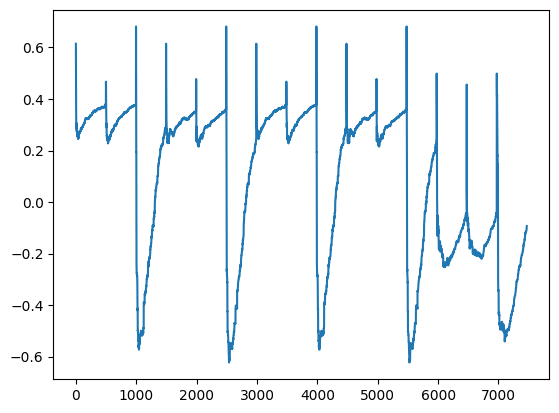

In [ ]:
import matplotlib.pyplot as plt

optimization_results = [pair[0] for pair in clustering_gs_result]

plt.plot(list(range(len(optimization_results))), optimization_results)
plt.show()

In [ ]:
optimization_results_sort = sorted(clustering_gs_result, key=lambda gs: gs[0])
best_estimator = optimization_results_sort[-1][1]

print(best_estimator.n_clusters_)
print(best_estimator.linkage)
print(best_estimator.metric)

2
single
manhattan


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt

In [ ]:
_dendrogram = linkage(data, method='single', metric='cityblock')

In [ ]:
cutree = cut_tree(_dendrogram, n_clusters=2)

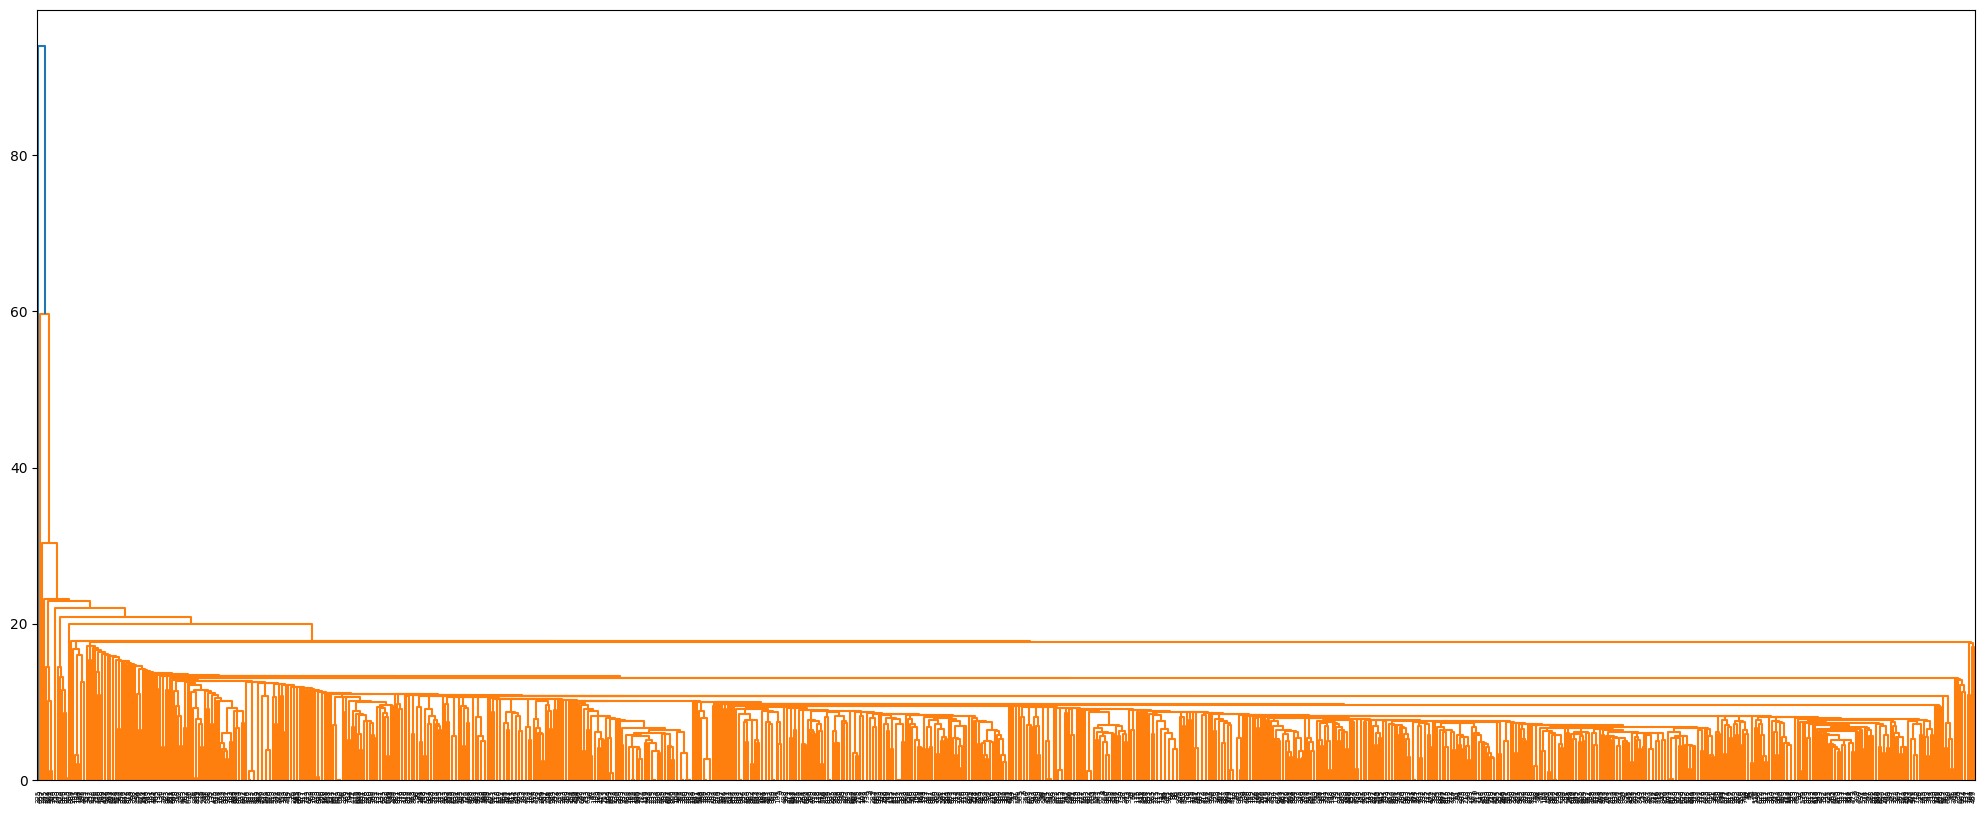

In [ ]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(_dendrogram)
plt.show()

# ontology
[docs](https://owlready2.readthedocs.io/en/v0.42/class.html#querying-individual-relations)

In [ ]:
best_estimator.children_

In [ ]:
!pip install owlready2

In [ ]:
from owlready2 import *
import types

In [ ]:
onto = get_ontology("http://itmo.ru/his2.1.owl")
n_samples = len(data)
with onto:
    for i, pair in enumerate(best_estimator.children_):
        # parent
        parent = f'Class_{i+178}'
        parent_ontology_entity = ''
        if not onto[parent]:
            parent_ontology_entity = types.new_class(parent, (Thing,))
        else:
            parent_ontology_entity = onto[parent]
        # child
        for child_idx in pair:
            cls, individ = f'Class_{child_idx}', f'Individ_{child_idx}'
            if child_idx < n_samples:
                cls_ontology_entity = onto[cls]
                if not cls_ontology_entity:
                    types.new_class(cls, (parent_ontology_entity,))
                else:
                    print(f'parent = {parent_ontology_entity}')
                    cls_ontology_entity.is_a.append(parent_ontology_entity)
            else:
                parent_ontology_entity(individ)

onto.save(file = "onto.owl", format = "ntriples")

In [ ]:
onto.destroy()